In [202]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt

In [203]:
covid_data=pd.read_csv(r'Downloads/covid_19_india.csv')

In [204]:
covid_india=covid_data.copy()

In [205]:
covid_india

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [206]:
covid_india.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [207]:
covid_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [208]:
covid_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

### Data Cleansing 

In [209]:
covid_india['ConfirmedIndianNational'].replace('-','0',inplace=True)
covid_india['ConfirmedForeignNational'].replace('-','0',inplace=True)

In [210]:
covid_india.groupby('State/UnionTerritory').count()

,Sno,Date,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
State/UnionTerritory,,,,,,,,
Andaman and Nicobar Islands,469,469,469,469,469,469,469,469
Andhra Pradesh,483,483,483,483,483,483,483,483
Arunachal Pradesh,461,461,461,461,461,461,461,461
Assam,463,463,463,463,463,463,463,463
Bihar,471,471,471,471,471,471,471,471
Bihar****,2,2,2,2,2,2,2,2
Cases being reassigned to states,60,60,60,60,60,60,60,60
Chandigarh,476,476,476,476,476,476,476,476
Chhattisgarh,476,476,476,476,476,476,476,476


In [211]:
covid_india.loc[covid_india["State/UnionTerritory"]=="Bihar****", "State/UnionTerritory"]="Bihar"

In [212]:
covid_india.loc[covid_india["State/UnionTerritory"]=="Telengana", "State/UnionTerritory"]="Telangana"

In [213]:
covid_india.loc[covid_india["State/UnionTerritory"]=="Daman & Diu", "State/UnionTerritory"]="Dadra and Nagar Haveli and Daman and Diu"

In [214]:
covid_india.loc[covid_india["State/UnionTerritory"]=="Dadra and Nagar Haveli", "State/UnionTerritory"]="Dadra and Nagar Haveli and Daman and Diu"

#Droping columns which is not mostly use for anlysis

In [215]:
covid_india.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [216]:
covid_india.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [217]:
covid_india.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [218]:
covid_india.describe()

,Cured,Deaths,Confirmed
count,1.685000e+04,16850.000000,1.685000e+04
mean,2.360353e+05,3485.222552,2.583667e+05
std,5.225438e+05,9330.541749,5.672808e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,2.658500e+03,22.000000,3.644750e+03
50%,2.889500e+04,453.000000,3.336150e+04
75%,2.537510e+05,3071.250000,2.666530e+05
max,5.872268e+06,123531.000000,6.113335e+06


### Total states in india for covid data anlysis?

In [219]:
covid_india['State/UnionTerritory'].nunique()

38

In [220]:
covid_india['active']=covid_india['Confirmed']-(covid_india['Cured']+covid_india['Deaths'])

### Above adding active cases columns

In [221]:
covid_india

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
16845,2021-07-07,Telangana,613124,3703,628282,11455
16846,2021-07-07,Tripura,63964,701,68612,3947
16847,2021-07-07,Uttarakhand,332006,7338,340882,1538
16848,2021-07-07,Uttar Pradesh,1682130,22656,1706818,2032


In [222]:
covid_india.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum()

,Confirmed,Cured,Deaths,active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,1675248,1589935,22624,62689
Andhra Pradesh,324146783,303427899,2475816,18243068
Arunachal Pradesh,5598324,5150519,19303,428502
Assam,80418492,74011348,459575,5947569
Bihar,108312449,101533848,775163,6003438
Cases being reassigned to states,345565,0,0,345565
Chandigarh,8691806,7980284,119356,592166
Chhattisgarh,128751782,117163544,1591126,9997112
Dadra and Nagar Haveli and Daman and Diu,1587570,1491338,882,95350


In [223]:
covid_india.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    4353478074
Cured        3977194136
Deaths         58726000
active        317557938
dtype: int64

In [224]:
print('Total no. of confirmed cases in india : 4353478074')
print('Total no. of cured cases in india     : 3977194136')
print('Total no. of Deaths cases in india    : 58726000')
print('Total no. of active cases in india    : 317212212')

Total no. of confirmed cases in india : 4353478074
Total no. of cured cases in india     : 3977194136
Total no. of Deaths cases in india    : 58726000
Total no. of active cases in india    : 317212212


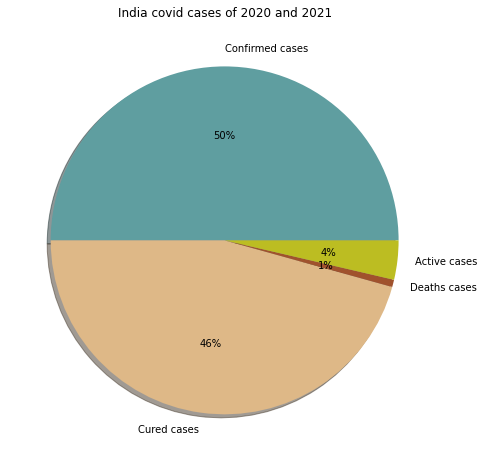

In [225]:
fig = plt.figure(figsize=(10,8))
data = [4353132348,3977194136,58726000,317212212]
labels = ['Confirmed cases','Cured cases','Deaths cases','Active cases']
colors = sns.color_palette('husl')
plt.pie(data,labels=labels,autopct='%.0f%%',colors=[ 'cadetblue','burlywood',  'sienna',  '#bcbd22',],shadow=True)
plt.title('India covid cases of 2020 and 2021')
plt.show()


### From above pie chart we came to know that in india (2020-2021) 50% are confirmed cases, 46% are cured cases , 4% active cases and 1% death cases

### Which state/country as maximum confirmed/cured/active cases in india?

In [226]:
covid_india.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].max().idxmax()

Confirmed    Maharashtra
Cured        Maharashtra
Deaths       Maharashtra
active       Maharashtra
dtype: object

### From above report maharashtra state is the highest state for Confirmed,cured,death and active cases in india (2020-2021)

### Which state/country as minimum confirmed/cured/active cases in india?

In [227]:
covid_india.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].min().idxmin()

Confirmed                    Lakshadweep
Cured        Andaman and Nicobar Islands
Deaths       Andaman and Nicobar Islands
active                             Delhi
dtype: object

### From above report lakshadweep had minimum Confirmed cases and Andaman and Nicobar Islands had minimum Cured and deaths cases and Delhi had lowest active cases in india (2020-2021)

### Dealing with time series

In [228]:
covid_india['Date']= pd.to_datetime(covid_india['Date'], format = "%Y-%m-%d")
covid_india['year']= pd.DatetimeIndex(covid_india['Date']).year
covid_india['month']= pd.DatetimeIndex(covid_india['Date']).month
covid_india['weekday']= pd.DatetimeIndex(covid_india['Date']).weekday
covid_india['day']= pd.DatetimeIndex(covid_india['Date']).day

In [229]:
covid_india

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active,year,month,weekday,day
0,2020-01-30,Kerala,0,0,1,1,2020,1,3,30
1,2020-01-31,Kerala,0,0,1,1,2020,1,4,31
2,2020-02-01,Kerala,0,0,2,2,2020,2,5,1
3,2020-02-02,Kerala,0,0,3,3,2020,2,6,2
4,2020-02-03,Kerala,0,0,3,3,2020,2,0,3
...,...,...,...,...,...,...,...,...,...,...
16845,2021-07-07,Telangana,613124,3703,628282,11455,2021,7,2,7
16846,2021-07-07,Tripura,63964,701,68612,3947,2021,7,2,7
16847,2021-07-07,Uttarakhand,332006,7338,340882,1538,2021,7,2,7
16848,2021-07-07,Uttar Pradesh,1682130,22656,1706818,2032,2021,7,2,7


### Year wise total cases in india 2020 - 2021

In [230]:
yearwise=covid_india.groupby(['year'])[['Confirmed','Cured','Deaths','active']].sum().reset_index()
yearwise

,year,Confirmed,Cured,Deaths,active
0,2020,1074022781,941314195,17022508,115686078
1,2021,3279455293,3035879941,41703492,201871860


### From above report we get to know yearwise total confimed ,cured,death and active cases

### Which date's has highest cases in india?

In [231]:
covid_india.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2021-07-07
Cured       2021-07-07
Deaths      2021-07-07
active      2021-05-10
dtype: datetime64[ns]

### From above report 7july 2021 has maximum confimed,cured,deaths cases and 10 may 2021 has maximum active cases in india(2020-2021)

### Which date's has lowest cases in india?

In [232]:
covid_india.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2020-01-30
Cured       2020-01-30
Deaths      2020-01-30
active      2020-01-30
dtype: datetime64[ns]

### From above report 30january 2020 as minimum confirmed,cured,deaths,active cases in india(2020-2021)

In [233]:
top_confimedcases=covid_india.groupby(['State/UnionTerritory'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False).reset_index()
top_confimedcases.head(10)

,State/UnionTerritory,Confirmed
0,Maharashtra,908892470
1,Karnataka,387597335
2,Kerala,344319045
3,Tamil Nadu,342829697
4,Andhra Pradesh,324146783
5,Uttar Pradesh,252843682
6,Delhi,236972842
7,West Bengal,209822848
8,Rajasthan,128998101
9,Chhattisgarh,128751782


### Above is the top 10 confirmed cases of covid 19 in india(2020-2021)

In [234]:
px.bar(x='State/UnionTerritory',y='Confirmed',data_frame=top_confimedcases,color='Confirmed',height=700)

### From above graph Maharshta is the highest confirmed cases state then follwed by karanataka ,kerala,Tamil nadu and andhra pradesh

In [235]:
top_curedcases=covid_india.groupby(['State/UnionTerritory'])[['Cured']].sum().sort_values(by='Cured',ascending=False).reset_index()
top_curedcases.head(10)

,State/UnionTerritory,Cured
0,Maharashtra,813788907
1,Karnataka,345648926
2,Tamil Nadu,317067499
3,Kerala,311127643
4,Andhra Pradesh,303427899
5,Uttar Pradesh,232529439
6,Delhi,224062704
7,West Bengal,195296839
8,Odisha,117984789
9,Rajasthan,117312772


### Above is the top 10 Cured cases of covid 19 in india(2020-2021)

In [236]:
px.bar(x='State/UnionTerritory',y='Cured',data_frame=top_curedcases,color='Cured',height=700)

### From above graph Maharshta is the highest Cured cases state then follwed by karanataka ,kerala,Tamil nadu and andhra pradesh

In [237]:
top_deathcases=covid_india.groupby(['State/UnionTerritory'])[['Deaths']].sum().sort_values(by='Deaths',ascending=False).reset_index()
top_deathcases.head(10)

,State/UnionTerritory,Deaths
0,Maharashtra,19314532
1,Karnataka,4819018
2,Tamil Nadu,4731627
3,Delhi,4066907
4,Uttar Pradesh,3347656
5,West Bengal,3214840
6,Andhra Pradesh,2475816
7,Punjab,2216735
8,Gujarat,1866811
9,Chhattisgarh,1591126


### Above is the top 10 Death cases of covid 19 in india(2020-2021)

In [238]:
px.bar(x='State/UnionTerritory',y='Deaths',data_frame=top_deathcases,color='Deaths',height=700)

### From above graph Maharshta is the highest death cases state then follwed by karanataka,Tamil nadu, delhi and uttar pradesh

In [239]:
top_activecases=covid_india.groupby(['State/UnionTerritory'])[['active']].sum().sort_values(by='active',ascending=False).reset_index()
top_activecases.head(10)

,State/UnionTerritory,active
0,Maharashtra,75789031
1,Karnataka,37129391
2,Kerala,31863648
3,Tamil Nadu,21030571
4,Andhra Pradesh,18243068
5,Uttar Pradesh,16966587
6,West Bengal,11311169
7,Rajasthan,10525506
8,Chhattisgarh,9997112
9,Delhi,8843231


### Above is the top 10 active cases of covid 19 in india(2020-2021)

In [240]:
px.bar(x='State/UnionTerritory',y='active',data_frame=top_activecases,color='active',height=700)

### From above graph Maharshta is the highest Cured cases state then follwed by karanataka ,kerala,Tamil nadu and andhra pradesh

In [241]:
total=covid_india['Confirmed'].sum()
total

4353478074

In [242]:
total_recovery=covid_india['Cured'].sum()
recovery_rate=(total_recovery/total)*100

In [243]:
total_death=covid_india['Deaths'].sum()
death_rate=(total_death/total)*100

In [253]:
toatl_active=covid_india['active'].sum()
active_rate=(toatl_active/total)*100

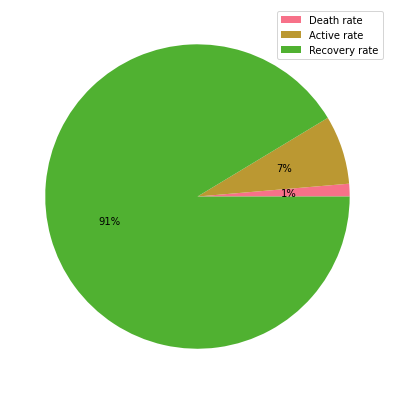

In [254]:
fig=plt.figure(figsize=(10,7))
data = [death_rate,active_rate,recovery_rate]
colors = sns.color_palette('husl')
plt.pie(data,autopct='%.0f%%',colors=colors)
plt.legend(['Death rate','Active rate','Recovery rate'])
plt.show()

### From above report we conclude that 91% is  recovery rate and 7% is active and 1% is death ratein india(2020-2021)

In [255]:
indiasix_months=covid_india.groupby('Date')[['Confirmed','Cured','Deaths','active']].sum()
indiasix_months

,Confirmed,Cured,Deaths,active
Date,,,,
2020-01-30,1,0,0,1
2020-01-31,1,0,0,1
2020-02-01,2,0,0,2
2020-02-02,3,0,0,3
2020-02-03,3,0,0,3
...,...,...,...,...
2021-07-03,30502362,29605779,401050,495533
2021-07-04,30545433,29658078,402005,485350
2021-07-05,30585229,29700430,402728,482071


In [256]:
india_sixmonths=indiasix_months.resample('6M').sum().reset_index()
india_sixmonths

,Date,Confirmed,Cured,Deaths,active
0,2020-01-31,2,0,0,2
1,2020-07-31,45655324,26858668,1216507,17580149
2,2021-01-31,1354837202,1229787546,20515168,104534488
3,2021-07-31,2952985546,2720547922,36994325,195443299


### Analysis of 2020 year only

In [257]:
covid_india2020=covid_india[covid_india['year']==2020]

In [258]:
covid_india2020

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active,year,month,weekday,day
0,2020-01-30,Kerala,0,0,1,1,2020,1,3,30
1,2020-01-31,Kerala,0,0,1,1,2020,1,4,31
2,2020-02-01,Kerala,0,0,2,2,2020,2,5,1
3,2020-02-02,Kerala,0,0,3,3,2020,2,6,2
4,2020-02-03,Kerala,0,0,3,3,2020,2,0,3
...,...,...,...,...,...,...,...,...,...,...
10077,2020-12-31,Telangana,278839,1541,286354,5974,2020,12,3,31
10078,2020-12-31,Tripura,32751,385,33264,128,2020,12,3,31
10079,2020-12-31,Uttarakhand,84149,1504,90616,4963,2020,12,3,31
10080,2020-12-31,Uttar Pradesh,562459,8352,584966,14155,2020,12,3,31


In [259]:
covid_india2020.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    1074022781
Cured         941314195
Deaths         17022508
active        115686078
dtype: int64

In [260]:
print('Total no. of confirmed cases in india : 1074022781')
print('Total no. of cured cases in india     : 941314195')
print('Total no. of Deaths cases in india    : 17022508')
print('Total no. of active cases in india    : 115686078')

Total no. of confirmed cases in india : 1074022781
Total no. of cured cases in india     : 941314195
Total no. of Deaths cases in india    : 17022508
Total no. of active cases in india    : 115686078


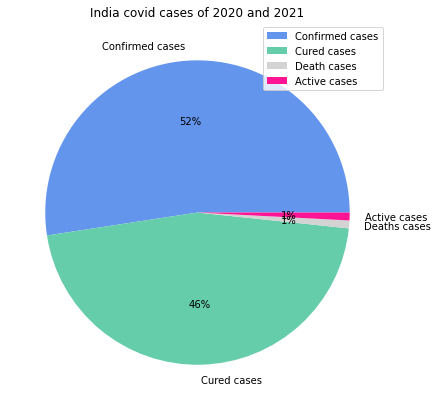

In [261]:
fig = plt.figure(figsize=(10,7))
data = [1074022781,941314195,17022508,17022508]
colors = sns.color_palette('husl')
plt.pie(data,labels=labels,autopct='%.0f%%',colors=['cornflowerblue', 'mediumaquamarine','lightgrey','deeppink'])
plt.legend(['Confirmed cases','Cured cases','Death cases','Active cases'])
plt.title('India covid cases of 2020 and 2021')
plt.show()

### From above pie chart we came to know that in india (2020) 57% are confirmed cases, 46% are cured cases , 1% active cases and 1% death cases

### Which state/country as highest confirmed/cured/active cases in india(2020)?

In [262]:
covid_india2020.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].max().idxmax()

Confirmed    Maharashtra
Cured        Maharashtra
Deaths       Maharashtra
active       Maharashtra
dtype: object

### From above report maharashtra state is the highest state for Confirmed,cured,death and active cases in india (2020)

### Which state/country as lowest confirmed/cured/active cases in india?

In [263]:
covid_india2020.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].min().idxmin()

Confirmed                    Lakshadweep
Cured        Andaman and Nicobar Islands
Deaths       Andaman and Nicobar Islands
active       Andaman and Nicobar Islands
dtype: object

### From above report lakshadweep had minimum Confirmed cases and Andaman and Nicobar Islands had minimum Cured,deaths active cases in india (2020)

In [264]:
covid_india2020.groupby(['year','month'])[['Confirmed','Cured','Deaths','active']].sum()

Confirmed      Cured   Deaths    active
year month                                         
2020 1              2          0        0         2
     2             86          0        0        86
     3           9687        808      202      8677
     4         422442      75443    13270    333729
     5        2938234    1133341    89834   1715059
     6       10558374    5668946   319690   4569738
     7       31726501   19980130   793511  10952860
     8       80749620   58580895  1553468  20615257
     9      149113758  118592934  2443374  28077450
     10     226770312  198824412  3457615  24488285
     11     264556412  246213201  3894165  14449046
     12     307177353  292244085  4457379  10475889

### From above report monthwise confirmed,cured,death and active cases of india (2020)

In [265]:
covid_india2020.groupby(['year','month','weekday'])[['Confirmed','Cured','Deaths','active']].sum()

Confirmed     Cured  Deaths   active
year month weekday                                      
2020 1     3                1         0       0        1
           4                1         0       0        1
     2     0               12         0       0       12
           1               12         0       0       12
           2               12         0       0       12
...                       ...       ...     ...      ...
     12    2         49511728  47102200  718461  1691067
           3         49649344  47269872  720365  1659107
           4         39494620  37545784  573255  1375581
           5         39608703  37673970  574807  1359926
           6         39720324  37800196  576300  1343828

[79 rows x 4 columns]

### From above report monthwise and weekwise confirmed,cured,death and active cases of india (2020)

### Which date's has highest cases in india?

In [266]:
covid_india2020.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2020-12-31
Cured       2020-12-31
Deaths      2020-12-31
active      2020-09-18
dtype: datetime64[ns]

### From above report 31 Dec 2020 has maximum confimed,cured,deaths cases and 19 sep has maximum active cases in india(2020)

### Which date's has lowest cases in india?

In [267]:
covid_india2020.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2020-01-30
Cured       2020-01-30
Deaths      2020-01-30
active      2020-01-30
dtype: datetime64[ns]

### From above report 30january 2020 as minimum confirmed,cured,deaths,active cases in india(2020)

In [268]:
top2020_confirmedcases=covid_india2020.groupby(['year','State/UnionTerritory'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False).reset_index()
top2020_confimedcases1=top2020_confirmedcases.head(10)
top2020_confimedcases1

,year,State/UnionTerritory,Confirmed
0,2020,Maharashtra,222900632
1,2020,Andhra Pradesh,104134066
2,2020,Tamil Nadu,100522250
3,2020,Karnataka,99337405
4,2020,Uttar Pradesh,62888710
5,2020,Delhi,59971050
6,2020,Kerala,51854118
7,2020,West Bengal,50095209
8,2020,Odisha,34566542
9,2020,Telangana,32264850


### Above is the top 10 confirmed cases of covid 19 in india(2020)

In [269]:
top2020_curedcases=covid_india2020.groupby(['year','State/UnionTerritory'])[['Cured']].sum().sort_values(by='Cured',ascending=False).reset_index()
top2020_curedcases1=top2020_curedcases.head(10)
top2020_curedcases1

,year,State/UnionTerritory,Cured
0,2020,Maharashtra,187034270
1,2020,Andhra Pradesh,95094768
2,2020,Tamil Nadu,91501715
3,2020,Karnataka,86698520
4,2020,Uttar Pradesh,55479286
5,2020,Delhi,53800255
6,2020,West Bengal,44508487
7,2020,Kerala,42951434
8,2020,Odisha,31636354
9,2020,Telangana,28534427


### Above is the top 10 cured cases of covid 19 in india(2020)

In [270]:
top2020_deathcases=covid_india2020.groupby(['year','State/UnionTerritory'])[['Deaths']].sum().sort_values(by='Deaths',ascending=False).reset_index()
top2020_deathcases1=top2020_deathcases.head(10)
top2020_deathcases1

,year,State/UnionTerritory,Deaths
0,2020,Maharashtra,6184938
1,2020,Tamil Nadu,1554515
2,2020,Karnataka,1408931
3,2020,Delhi,1156444
4,2020,West Bengal,941478
5,2020,Uttar Pradesh,936356
6,2020,Andhra Pradesh,871178
7,2020,Gujarat,667828
8,2020,Punjab,521916
9,2020,Madhya Pradesh,415050


### Above is the top 10 Deaths cases of covid 19 in india(2020)

In [271]:
top2020_activecases=covid_india2020.groupby(['year','State/UnionTerritory'])[['active']].sum().sort_values(by='active',ascending=False).reset_index()
top2020_activecases1=top2020_activecases.head(10)
top2020_activecases1

,year,State/UnionTerritory,active
0,2020,Maharashtra,29681424
1,2020,Karnataka,11229954
2,2020,Kerala,8709308
3,2020,Andhra Pradesh,8168120
4,2020,Tamil Nadu,7466020
5,2020,Uttar Pradesh,6473068
6,2020,Delhi,5014351
7,2020,West Bengal,4645244
8,2020,Telangana,3533529
9,2020,Chhattisgarh,3135488


### Above is the top 10 active cases of covid 19 in india(2020)

### Analysis of covid 2021 year only

In [272]:
covid_india2021=covid_india[covid_india['year']==2021]

In [273]:
covid_india2021

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active,year,month,weekday,day
10082,2021-01-01,Andhra Pradesh,871916,7108,882286,3262,2021,1,4,1
10083,2021-01-01,Andaman and Nicobar Islands,4826,62,4945,57,2021,1,4,1
10084,2021-01-01,Arunachal Pradesh,16564,56,16719,99,2021,1,4,1
10085,2021-01-01,Assam,211910,1045,216211,3256,2021,1,4,1
10086,2021-01-01,Bihar,245476,1397,251743,4870,2021,1,4,1
...,...,...,...,...,...,...,...,...,...,...
16845,2021-07-07,Telangana,613124,3703,628282,11455,2021,7,2,7
16846,2021-07-07,Tripura,63964,701,68612,3947,2021,7,2,7
16847,2021-07-07,Uttarakhand,332006,7338,340882,1538,2021,7,2,7
16848,2021-07-07,Uttar Pradesh,1682130,22656,1706818,2032,2021,7,2,7


In [274]:
covid_india2021.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    3279455293
Cured        3035879941
Deaths         41703492
active        201871860
dtype: int64

In [275]:
print('Total no. of confirmed cases in india : 3279455293')
print('Total no. of cured cases in india     : 3035879941')
print('Total no. of Deaths cases in india    : 41703492')
print('Total no. of active cases in india    : 201871860')

Total no. of confirmed cases in india : 3279455293
Total no. of cured cases in india     : 3035879941
Total no. of Deaths cases in india    : 41703492
Total no. of active cases in india    : 201871860


### From above we konw the total no. of cases in india (2021)

### Which state/country as highest confirmed/cured/active cases in india(2020)?

In [276]:
covid_india2021.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].max().idxmax()

Confirmed    Maharashtra
Cured        Maharashtra
Deaths       Maharashtra
active       Maharashtra
dtype: object

### Mahrashtra has maximum cases in india (2021)

### Which state/country as lowest confirmed/cured/active cases in india?

In [277]:
covid_india2021.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].min().idxmin()

Confirmed    Lakshadweep
Cured        Lakshadweep
Deaths       Lakshadweep
active             Delhi
dtype: object

### Lakshadwwep state has minimum confirmed,cured,deaths and active cases in india (2021)

In [278]:
covid_india2021.groupby(['year','month'])[['Confirmed','Cured','Deaths','active']].sum()

Confirmed      Cured    Deaths    active
year month                                          
2021 1      326469747  315332019   4709167   6428561
     2      305631803  297133802   4359434   4138567
     3      356305616  342610397   4935253   8759966
     4      440660671  384990190   5340298  50330183
     5      751927486  645106765   8390917  98429804
     6      884673464  843153433  11155377  30364654
     7      213786506  207553335   2813046   3420125

### From above report we know the monthwise report of all cases in india 2020

In [279]:
covid_india2021.groupby(['year','month','weekday'])[['Confirmed','Cured','Deaths','active']].sum()

Confirmed      Cured   Deaths    active
year month weekday                                         
2021 1     0         42041018   40581202   606698    853118
           1         42094698   40661990   607320    825388
           2         42155266   40731429   608085    815752
           3         42219447   40802934   608779    807734
           4         52573285   50761657   758524   1053104
           5         52653083   50852751   759440   1040892
           6         52732950   50940056   760321   1032573
     2     0         43517264   42290118   621589    605557
           1         43555693   42342617   621920    591156
           2         43615623   42395799   622328    597496
           3         43649043   42449173   622782    577088
           4         43710079   42503959   623206    582914
           5         43764416   42552920   623618    587878
           6         43819685   42599216   623991    596478
     3     0         57411611   55184068   795545   1431998
           1         57547881   55300132   796314   1451435
           2         57713439   55416835   797362   1499242
           3         45681769   44040796   635406   1005567
           4         45820305   44126356   636056   1057893
           5         45990010   44229743   636900   1123367
           6         46140601   44312467   637670   1190464
     4     0         58491866   51096868   709172   6685826
           1         59332898   51650767   715029   6967102
           2         60289007   52221581   722002   7345424
           3         73536768   64297398   892401   8346969
           4         74682261   65018774   900596   8762891
           5         56735276   50099317   697739   5938220
           6         57592595   50605485   703359   6283751
     5     0        122353623  105558654  1372285  15422684
           1         95453220   81291969  1058350  13102901
           2         96660211   82671552  1075021  12913638
           3         97922608   84005058  1090842  12826708
           4         99125855   85298095  1106626  12721134
           5        119449089  102296640  1334367  15818082
           6        120962880  103984797  1353426  15624657
     6     0        118634937  113475933  1508356   3650648
           1        147037156  139862202  1847174   5327780
           2        147421563  140493496  1857317   5070750
           3        117408198  111601487  1471549   4335162
           4        117746411  112096642  1480581   4169188
           5        118060723  112578408  1490793   3991522
           6        118364476  113045265  1499607   3819604
     7     0         30585229   29700430   402728    482071
           1         30619932   29752294   403281    464357
           2         30663665   29799534   404211    459920
           3         30411634   29488918   399459    523257
           4         30458251   29548302   400312    509637
           5         30502362   29605779   401050    495533
           6         30545433   29658078   402005    485350

### From above we get to know the total weekly cases of india (2021)

### Which date's has highest cases in india?

In [280]:
covid_india2021.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2021-07-07
Cured       2021-07-07
Deaths      2021-07-07
active      2021-05-10
dtype: datetime64[ns]

### In 7th july 2021 there is highest confirmed,cured,deaths cases and 10th may 2021 has active cases

### Which date's has lowest cases in india?

In [281]:
covid_india2021.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2021-01-01
Cured       2021-01-01
Deaths      2021-01-01
active      2021-02-18
dtype: datetime64[ns]

### In 1st jan  there is lowest confirmed,cured,deaths cases and 18th feb has lowest active cases

In [282]:
top2021_confirmedcases=covid_india2021.groupby(['year','State/UnionTerritory'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False).reset_index()
top2021_confimedcases1=top2021_confirmedcases.head(10)
top2021_confimedcases1

,year,State/UnionTerritory,Confirmed
0,2021,Maharashtra,685991838
1,2021,Kerala,292464927
2,2021,Karnataka,288259930
3,2021,Tamil Nadu,242307447
4,2021,Andhra Pradesh,220012717
5,2021,Uttar Pradesh,189954972
6,2021,Delhi,177001792
7,2021,West Bengal,159727639
8,2021,Chhattisgarh,106849807
9,2021,Rajasthan,101501150


### Above is the top 10 confirmed cases of covid 19 in india(2021)

In [283]:
top2021_curedcases=covid_india2021.groupby(['year','State/UnionTerritory'])[['Cured']].sum().sort_values(by='Cured',ascending=False).reset_index()
top2021_curedcases1=top2021_curedcases.head(10)
top2021_curedcases1

,year,State/UnionTerritory,Cured
0,2021,Maharashtra,626754637
1,2021,Kerala,268176209
2,2021,Karnataka,258950406
3,2021,Tamil Nadu,225565784
4,2021,Andhra Pradesh,208333131
5,2021,Uttar Pradesh,177050153
6,2021,Delhi,170262449
7,2021,West Bengal,150788352
8,2021,Chhattisgarh,98637274
9,2021,Rajasthan,93153861


### Above is the top 10 cured cases of covid 19 in india(2021)

In [284]:
top2021_deathcases=covid_india2021.groupby(['year','State/UnionTerritory'])[['Deaths']].sum().sort_values(by='Deaths',ascending=False).reset_index()
top2021_deathcases1=top2021_deathcases.head(10)
top2021_deathcases1

,year,State/UnionTerritory,Deaths
0,2021,Maharashtra,13129594
1,2021,Karnataka,3410087
2,2021,Tamil Nadu,3177112
3,2021,Delhi,2910463
4,2021,Uttar Pradesh,2411300
5,2021,West Bengal,2273362
6,2021,Punjab,1694819
7,2021,Andhra Pradesh,1604638
8,2021,Chhattisgarh,1350909
9,2021,Gujarat,1198983


### Above is the top 10 death cases of covid 19 in india(2021)

In [285]:
top2021_activecases=covid_india2021.groupby(['year','State/UnionTerritory'])[['active']].sum().sort_values(by='active',ascending=False).reset_index()
top2021_activecases1=top2021_activecases.head(10)
top2021_activecases1

,year,State/UnionTerritory,active
0,2021,Maharashtra,46107607
1,2021,Karnataka,25899437
2,2021,Kerala,23154340
3,2021,Tamil Nadu,13564551
4,2021,Uttar Pradesh,10493519
5,2021,Andhra Pradesh,10074948
6,2021,Rajasthan,7475444
7,2021,Chhattisgarh,6861624
8,2021,West Bengal,6665925
9,2021,Gujarat,5795183


### Above is the top 10 Active cases of covid 19 in india(2021)

Text(0.5, 1.0, 'Covid Cases in 2021')

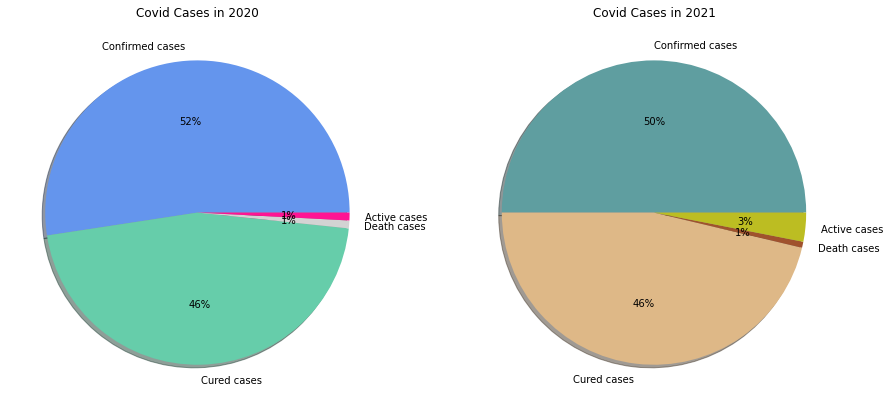

In [286]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
data = [1074022781,941314195,17022508,17022508]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['cornflowerblue', 'mediumaquamarine','lightgrey','deeppink'],shadow=True)
ax1.set_title('Covid Cases in 2020')

data = [3279455293,3035879941,41703492,201871860]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=[ 'cadetblue','burlywood',  'sienna',  '#bcbd22',],shadow=True)
ax2.set_title('Covid Cases in 2021')


### From above report we know the difference between cases of covid 19 of year 2020 and 2021 i.e 
###   --------2020 year                -----------------------------------------           2021 year 
### confirmed cases - 52%     --------------   confirmed cases - 50%  
### cured cases         - 46 %   --------------------  cured cases     - 46 %     
### active cases         - 1 %   ---------------------- active cases    - 3 %
### death cases          - 1 %    ----------------------- death cases     - 1%

In [287]:
total_2020=covid_india2020['Confirmed'].sum()
total_2020
total_2021=covid_india2021['Confirmed'].sum()
total_2021

3279455293

In [288]:
total2020_recovery=covid_india2020['Cured'].sum()
recovery2020_rate=(total2020_recovery/total_2020)*100
total2021_recovery=covid_india2021['Cured'].sum()
recovery2021_rate=(total2021_recovery/total_2021)*100

In [289]:
total2020_death=covid_india2020['Deaths'].sum()
death2020_rate=(total2020_death/total_2020)*100
total2021_death=covid_india2021['Deaths'].sum()
death2021_rate=(total2021_death/total_2021)*100

In [290]:
toatl2020_active=covid_india2020['active'].sum()
active2020_rate=(toatl2020_active/total_2020)*100
toatl2021_active=covid_india2021['active'].sum()
active2021_rate=(toatl2021_active/total_2021)*100

Text(0.5, 1.0, 'India cases of year 2021')

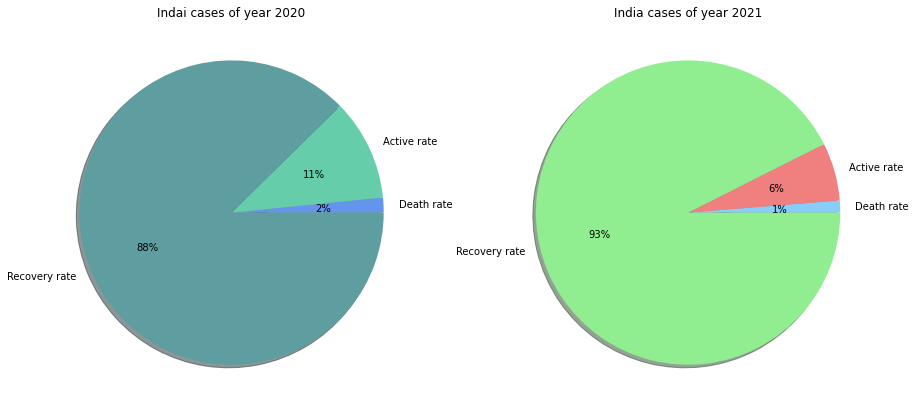

In [291]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,12))
data = [death2020_rate,active2020_rate,recovery2020_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['cornflowerblue', 'mediumaquamarine','cadetblue'],shadow=True)
ax1.set_title('Indai cases of year 2020')
data = [death2021_rate,active2021_rate,recovery2021_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=['lightskyblue', 'lightcoral','lightgreen'],shadow=True)
ax2.set_title('India cases of year 2021')


### From above report we know the difference between rates  of covid 19 cases of year 2020 and 2021 i.e 
###   --------2020 year                --------------------------- 2021 year 
### Recovery rate - 88%     --------------   Recovery rate - 93%  
### Active rate         - 11 %   --------------------  Active rate     -  6%     
### Death rate        - 2 %   ---------------------- Death rate   - 1 %


In [292]:
yearwise

,year,Confirmed,Cured,Deaths,active
0,2020,1074022781,941314195,17022508,115686078
1,2021,3279455293,3035879941,41703492,201871860


### Above is the total of all cases in India (2020-2021)

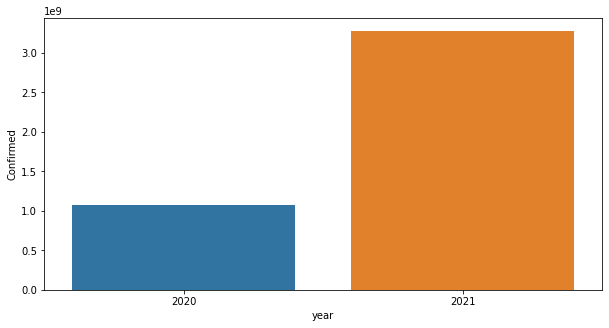

In [293]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Confirmed',data=yearwise)
plt.show()

### From above report we know that the maximum confirmed cases are in 2021 than 2020 (India)

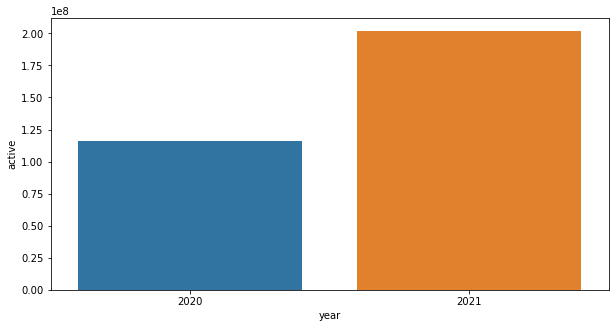

In [294]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='active',data=yearwise)
plt.show()

### From above report we know that the maximum active cases are in 2021 than 2020 (India)

In [295]:
px.bar(x='year',y='Deaths',data_frame=yearwise,color=['year 2020','year 2021'],height=600)

### From above report we know that the maximum death cases are in 2021 than 2020 (India)

In [296]:
px.bar(x='year',y='active',data_frame=yearwise,color=['year 2020','year 2021'],height=600)

### From above report we know that the active cases are in 2021 than 2020 (India)

# Maharashtra

In [297]:
covid_mah=covid_india[covid_india['State/UnionTerritory']=='Maharashtra']

In [298]:
covid_mah

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active,year,month,weekday,day
76,2020-03-09,Maharashtra,0,0,2,2,2020,3,0,9
91,2020-03-10,Maharashtra,0,0,5,5,2020,3,1,10
97,2020-03-11,Maharashtra,0,0,2,2,2020,3,2,11
120,2020-03-12,Maharashtra,0,0,11,11,2020,3,3,12
133,2020-03-13,Maharashtra,0,0,14,14,2020,3,4,13
...,...,...,...,...,...,...,...,...,...,...
16690,2021-07-03,Maharashtra,5836920,122353,6079352,120079,2021,7,5,3
16726,2021-07-04,Maharashtra,5845315,122724,6088841,120802,2021,7,6,4
16762,2021-07-05,Maharashtra,5848693,123030,6098177,126454,2021,7,0,5
16798,2021-07-06,Maharashtra,5861720,123136,6104917,120061,2021,7,1,6


### 2020 and 2021 maharashtra covid data

In [299]:
covid_mah.groupby('State/UnionTerritory').count()

,Date,Cured,Deaths,Confirmed,active,year,month,weekday,day
State/UnionTerritory,,,,,,,,,
Maharashtra,486,486,486,486,486,486,486,486,486


In [300]:
co=covid_mah.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

In [301]:
print('Total no. of confirmed cases in india : 908892470')
print('Total no. of cured cases in india     : 813788907')
print('Total no. of Deaths cases in india    : 19314532')
print('Total no. of active cases in india    : 75789031')

Total no. of confirmed cases in india : 908892470
Total no. of cured cases in india     : 813788907
Total no. of Deaths cases in india    : 19314532
Total no. of active cases in india    : 75789031


In [302]:
import matplotlib.patches as mpatches

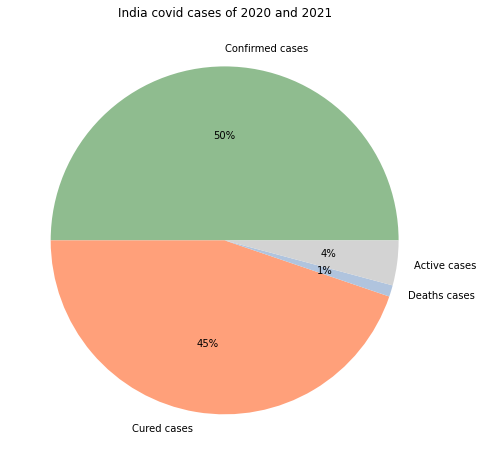

In [303]:
fig = plt.figure(figsize=(10,8))
data = [908892470,813788907,19314532,75789031]
labels = ['Confirmed cases','Cured cases','Deaths cases','Active cases']
colors = sns.color_palette('husl')
plt.pie(data,labels=labels,autopct='%.0f%%',colors=['darkseagreen', 'lightsalmon','lightsteelblue','lightgray'])
plt.title('India covid cases of 2020 and 2021')
plt.show()

### From above pie chart we came to know that in maharashtra (2020-2021) 50% are confirmed cases, 45% are cured cases , 4% active cases and 1% death cases

### Which year as maximum confirmed/cured/active cases in india?

In [304]:
covid_mah.groupby(['year'])[['Confirmed','Cured','Deaths','active']].max().idxmax()

Confirmed    2021
Cured        2021
Deaths       2021
active       2021
dtype: int64

### Which year as minimum confirmed/cured/active cases in india?

In [305]:
covid_mah.groupby(['year'])[['Confirmed','Cured','Deaths','active']].min().idxmin()

Confirmed    2020
Cured        2020
Deaths       2020
active       2020
dtype: int64

In [306]:
yearall=covid_mah.groupby(['year','month','weekday'])[['Confirmed','Cured','Deaths','active']].sum().reset_index()
yearall

,year,month,weekday,Confirmed,Cured,Deaths,active
0,2020,3,0,306,25,10,271
1,2020,3,1,349,39,12,298
2,2020,3,2,172,1,4,167
3,2020,3,3,182,1,4,177
4,2020,3,4,196,15,5,176
...,...,...,...,...,...,...,...
114,2021,7,2,6113335,5872268,123531,117536
115,2021,7,3,6061404,5819901,121945,119558
116,2021,7,4,6070599,5828535,122197,119867
117,2021,7,5,6079352,5836920,122353,120079


### Above is the yearwise all cases in maharashtra (2020-2021)

### Which date's has highest cases in maharashtra(2020-2021)?

In [307]:
covid_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2021-07-07
Cured       2021-07-07
Deaths      2021-07-07
active      2021-04-23
dtype: datetime64[ns]

### From above report 7july 2021 has maximum confimed,cured,deaths cases and 23rd april 2021 has maximum active cases in maharashtra(2020-2021)

In [308]:
covid_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2020-03-09
Cured       2020-03-09
Deaths      2020-03-09
active      2020-03-09
dtype: datetime64[ns]

### From above report 9th march 2020 as minimum confirmed,cured,deaths,active cases in maharashtra(2020-2021) 

In [309]:
topmah_confimedcases=covid_mah.groupby(['Date'])[['Confirmed']].sum().sort_values(by='Confirmed',ascending=False).reset_index()
topmah_confimedcases.head(10)

,Date,Confirmed
0,2021-07-07,6113335
1,2021-07-06,6104917
2,2021-07-05,6098177
3,2021-07-04,6088841
4,2021-07-03,6079352
5,2021-07-02,6070599
6,2021-07-01,6061404
7,2021-06-30,6051633
8,2021-06-29,6043548
9,2021-06-28,6036821


### Above is the top 10  date with confirmed cases of covid 19 in maharashtra(2020-2021)

In [310]:
topmah_curedcases=covid_mah.groupby(['Date'])[['Cured']].sum().sort_values(by='Cured',ascending=False).reset_index()
topmah_curedcases.head(10)

,Date,Cured
0,2021-07-07,5872268
1,2021-07-06,5861720
2,2021-07-05,5848693
3,2021-07-04,5845315
4,2021-07-03,5836920
5,2021-07-02,5828535
6,2021-07-01,5819901
7,2021-06-30,5809548
8,2021-06-29,5800925
9,2021-06-28,5790113


### Above is the top 10  date with cured cases of covid 19 in maharashtra(2020-2021)

In [311]:
topmah_deathcases=covid_mah.groupby(['Date'])[['Deaths']].sum().sort_values(by='Deaths',ascending=False).reset_index()
topmah_deathcases.head(10)

,Date,Deaths
0,2021-07-07,123531
1,2021-07-06,123136
2,2021-07-05,123030
3,2021-07-04,122724
4,2021-07-03,122353
5,2021-07-02,122197
6,2021-07-01,121945
7,2021-06-30,121804
8,2021-06-29,121573
9,2021-06-28,121286


### Above is the top 10  date with death cases of covid 19 in maharashtra(2020-2021)

In [312]:
topmah_activecases=covid_mah.groupby(['Date'])[['active']].sum().sort_values(by='active',ascending=False).reset_index()
topmah_activecases.head(10)

,Date,active
0,2021-04-23,701614
1,2021-04-26,700207
2,2021-04-22,697467
3,2021-04-25,696298
4,2021-04-24,693632
5,2021-04-21,685552
6,2021-04-20,678198
7,2021-04-27,676647
8,2021-04-29,675451
9,2021-04-28,674358


### Above is the top 10  date with active cases of covid 19 in maharashtra(2020-2021)

In [313]:
total_mah=covid_mah['Confirmed'].sum()
total_mah

908892470

In [314]:
totalmah_recovery=covid_mah['Cured'].sum()
recoverymah_rate=(totalmah_recovery/total_mah)*100

In [315]:
totalmah_death=covid_mah['Deaths'].sum()
deathmah_rate=(totalmah_death/total_mah)*100

In [316]:
toatlmah_active=covid_mah['active'].sum()
activemah_rate=(toatlmah_active/total_mah)*100

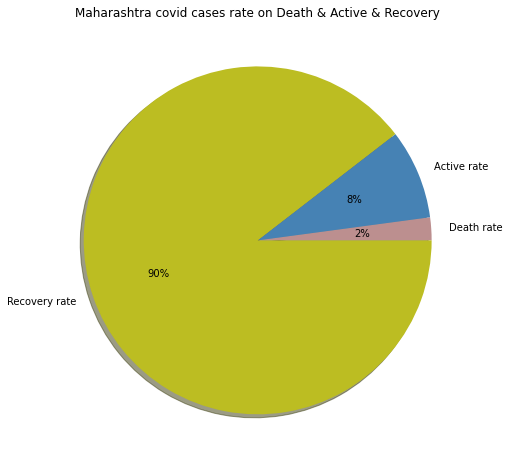

In [317]:
plt.figure(figsize=(10,8))
data = [deathmah_rate,activemah_rate,recoverymah_rate]
labels = ['Death rate','Active rate','Recovery rate']
colors = sns.color_palette('husl')
plt.pie(data,labels=labels,autopct='%.0f%%',colors=[ 'rosybrown','steelblue','#bcbd22'],shadow=True)
plt.title('Maharashtra covid cases rate on Death & Active & Recovery')
plt.show()

### From above report we conclude that 90% is  recovery rate and 8% is active and 2% is death rate in maharashtra (2020-2021)

### analysis of maharashtra covid 19 (2020 only) 

In [318]:
covid2020_mah=covid_mah[covid_mah['year']==2020]

In [319]:
covid2020_mah

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active,year,month,weekday,day
76,2020-03-09,Maharashtra,0,0,2,2,2020,3,0,9
91,2020-03-10,Maharashtra,0,0,5,5,2020,3,1,10
97,2020-03-11,Maharashtra,0,0,2,2,2020,3,2,11
120,2020-03-12,Maharashtra,0,0,11,11,2020,3,3,12
133,2020-03-13,Maharashtra,0,0,14,14,2020,3,4,13
...,...,...,...,...,...,...,...,...,...,...
9922,2020-12-27,Maharashtra,1807824,49189,1916236,59223,2020,12,6,27
9958,2020-12-28,Maharashtra,1809948,49255,1919550,60347,2020,12,0,28
9994,2020-12-29,Maharashtra,1814449,49305,1922048,58294,2020,12,1,29
10030,2020-12-30,Maharashtra,1820021,49373,1925066,55672,2020,12,2,30


In [320]:
covid2020_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    222900632
Cured        187034270
Deaths         6184938
active        29681424
dtype: int64

In [321]:
print('Total no. of confirmed cases in india : 222900632')
print('Total no. of cured cases in india     : 187034270')
print('Total no. of Deaths cases in india    : 6184938')
print('Total no. of active cases in india    : 29681424')

Total no. of confirmed cases in india : 222900632
Total no. of cured cases in india     : 187034270
Total no. of Deaths cases in india    : 6184938
Total no. of active cases in india    : 29681424


### Which date's has highest cases in maharashtra(2020)?

In [322]:
covid2020_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2020-12-31
Cured       2020-12-31
Deaths      2020-12-31
active      2020-09-18
dtype: datetime64[ns]

### Which date's has lowest cases in maharashtra(2020)?

In [323]:
covid2020_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2020-03-09
Cured       2020-03-09
Deaths      2020-03-09
active      2020-03-09
dtype: datetime64[ns]

In [324]:
covid2020_mah.groupby(['month','weekday'])[['Confirmed','Cured','active','Deaths']].sum().reset_index()

,month,weekday,Confirmed,Cured,active,Deaths
0,3,0,306,25,271,10
1,3,1,349,39,298,12
2,3,2,172,1,167,4
3,3,3,182,1,177,4
4,3,4,196,15,176,5
...,...,...,...,...,...,...
65,12,2,9402524,8808603,352260,241661
66,12,3,9418305,8833870,342310,242125
67,12,4,7502288,7029599,279688,193001
68,12,5,7517176,7045043,278772,193361


### Above is month and weekwise cases in maharshtra (2020)

### analysis of maharashtra covid 19 (2021 only) 

In [325]:
covid2021_mah=covid_mah[covid_mah['year']==2021]

In [326]:
covid2021_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    685991838
Cured        626754637
Deaths        13129594
active        46107607
dtype: int64

In [327]:
print('Total no. of confirmed cases in india : 685991838')
print('Total no. of cured cases in india     : 626754637')
print('Total no. of Deaths cases in india    : 13129594')
print('Total no. of active cases in india    : 46107607')

Total no. of confirmed cases in india : 685991838
Total no. of cured cases in india     : 626754637
Total no. of Deaths cases in india    : 13129594
Total no. of active cases in india    : 46107607


### Which date's has highest cases in maharashtra(2021)?

In [328]:
covid2021_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2021-07-07
Cured       2021-07-07
Deaths      2021-07-07
active      2021-04-23
dtype: datetime64[ns]

### From above report 7july 2021 has maximum confimed,cured,deaths cases and 23rd april 2021 has maximum active cases in Maharashtra(2021)

### Which date's has lowest cases in maharashtra(2021)?

In [329]:
covid2021_mah.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2021-01-01
Cured       2021-01-01
Deaths      2021-01-01
active      2021-02-12
dtype: datetime64[ns]

### From above report 1st jan 2021 as minimum confirmed,cured,deaths and 12th feb 2021 has maximum active cases in Maharashtra(2021)

In [330]:
covid2021_mah.groupby(['month'])[['Confirmed','Cured','active','Deaths']].sum().reset_index()

,month,Confirmed,Cured,active,Deaths
0,1,61433195,58313365,1560294,1559536
1,2,57992941,55303793,1246207,1442941
2,3,73873249,67054059,5174645,1644545
3,4,109094556,89845420,17453798,1795338
4,5,163559278,145968060,15072468,2518750
5,6,177421994,169356588,4755838,3309568
6,7,42616625,40913352,844357,858916


### Above is monthwise cases of covid 19 of year 2021 (maharashtra)

In [331]:
covid2021_mah.groupby(['month','weekday','day'])[['Confirmed','Cured','active','Deaths']].sum().reset_index()

,month,weekday,day,Confirmed,Cured,active,Deaths
0,1,0,4,1942136,1836999,55471,49666
1,1,0,11,1969114,1863702,55351,50061
2,1,0,18,1990759,1886469,53852,50438
3,1,0,25,2009106,1912264,46057,50785
4,1,1,5,1947011,1847361,49955,49695
...,...,...,...,...,...,...,...
183,7,2,7,6113335,5872268,117536,123531
184,7,3,1,6061404,5819901,119558,121945
185,7,4,2,6070599,5828535,119867,122197
186,7,5,3,6079352,5836920,120079,122353


Text(0.5, 1.0, 'Covid Cases in maharsahtra 2021')

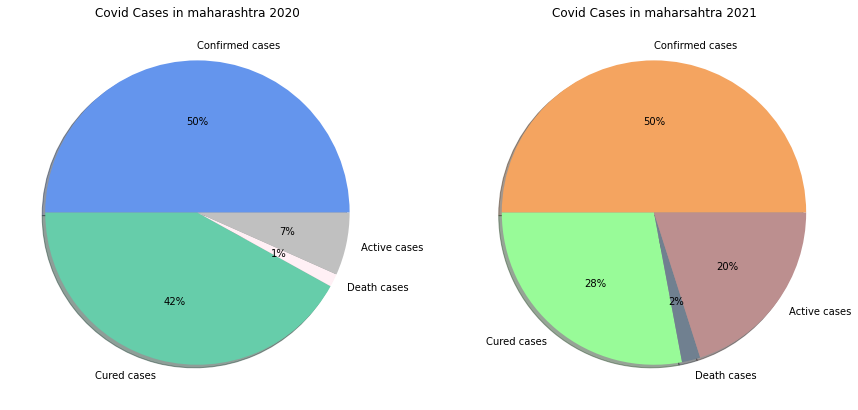

In [332]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,18))
data = [222900632,187034270,6184938,29681424]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['cornflowerblue', 'mediumaquamarine','lavenderblush','silver'],shadow=True)
ax1.set_title('Covid Cases in maharashtra 2020')

data = [8774499,4906066,342978,3525455]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=['sandybrown', 'palegreen','slategrey','rosybrown'],shadow=True)
ax2.set_title('Covid Cases in maharsahtra 2021')


### From above report we know the difference between cases of covid 19 of year 2020 and 2021 i.e 
###   --------Maharashtra 2020 year------------------------Maharashtra  2021 year 
### confirmed cases - 50%     -------------------------------- confirmed cases - 50%  
### cured cases         - 42 %   ------------------------------------  cured cases     - 21 %     
### active cases         - 7 %   ------------------------------------- active cases    - 20 %
### death cases          - 1 %    ------------------------------------ death cases     - 2%

In [333]:
totalmah_2020=covid2020_mah['Confirmed'].sum()
totalmah_2020
totalmah_2021=covid2021_mah['Confirmed'].sum()
totalmah_2021

685991838

In [334]:
totalmah2020_recovery=covid2020_mah['Cured'].sum()
recoverymah2020_rate=(totalmah2020_recovery/totalmah_2020)*100
totalmah2021_recovery=covid2021_mah['Cured'].sum()
recoverymah2021_rate=(totalmah2021_recovery/totalmah_2021)*100

In [335]:
totalmah2020_death=covid2020_mah['Deaths'].sum()
deathmah2020_rate=(totalmah2020_death/totalmah_2020)*100
totalmah2021_death=covid2021_mah['Deaths'].sum()
deathmah2021_rate=(totalmah2021_death/totalmah_2021)*100

In [336]:
toatlmah2020_active=covid2020_mah['active'].sum()
activemah2020_rate=(toatlmah2020_active/totalmah_2020)*100
toatlmah2021_active=covid2021_mah['active'].sum()
activemah2021_rate=(toatlmah2021_active/totalmah_2021)*100

Text(0.5, 1.0, 'maharashta2021')

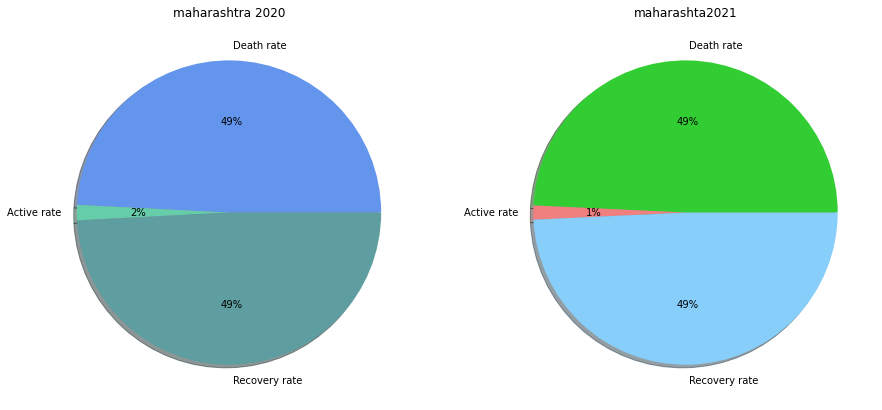

In [337]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
data = [recoverymah2020_rate,deathmah2020_rate,recoverymah2020_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['cornflowerblue', 'mediumaquamarine','cadetblue'],shadow=True)
ax1.set_title('maharashtra 2020')
data = [recoverymah2021_rate,deathmah2020_rate,recoverymah2021_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=['limegreen', 'lightcoral','lightskyblue'],shadow=True)
ax2.set_title('maharashta2021')


### From above report we know the difference between rates  of covid 19 cases of year 2020 and 2021 i.e 
###   --------maharashta 2020 year                -----------------------------maharshtra 2021 year 
### Recovery rate - 49%     ----------------------------------------   Recovery rate - 49%  
### Active rate         - 2 %   ---------------------------------------------  Active rate     -  1%     
### Death rate        - 49 %   ------------------------------------------- Death rate   - 49 %

### Analysis of july 2020 and july 2021

In [338]:
july_2020=covid2020_mah[covid2020_mah['month']==7]

In [339]:
july_2021=covid2021_mah[covid2021_mah['month']==7]

In [340]:
july_2020.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    8774499
Cured        4906066
Deaths        342978
active       3525455
dtype: int64

### Above is the total cases of july month 2020 in maharashtra 

In [341]:
july_2021.groupby(['State/UnionTerritory'])[['Confirmed','Cured','Deaths','active']].sum().sum()

Confirmed    42616625
Cured        40913352
Deaths         858916
active         844357
dtype: int64

### Above is the total cases of july month 2021 in maharashtra 

In [342]:
july_2020.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2020-07-31
Cured       2020-07-31
Deaths      2020-07-31
active      2020-07-27
dtype: datetime64[ns]

### From above report 31 july 2020 has maximum confimed,cured,deaths cases and 27 july 2020 has maximum active cases in Maharashtra( july 2020)

In [343]:
july_2020.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2020-07-01
Cured       2020-07-01
Deaths      2020-07-01
active      2020-07-01
dtype: datetime64[ns]

### From above report 1st july 2020 has minimum confimed,cured,deaths and active cases in Maharashtra( july 2020)

In [344]:
july_2021.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmax()

Confirmed   2021-07-07
Cured       2021-07-07
Deaths      2021-07-07
active      2021-07-05
dtype: datetime64[ns]

### From above report 7 july 2021 has maximum confimed,cured,deaths cases and 5 july 2021 has maximum active cases in Maharashtra( july 2021)

In [345]:
july_2021.groupby(['Date'])[['Confirmed','Cured','Deaths','active']].sum().idxmin()

Confirmed   2021-07-01
Cured       2021-07-01
Deaths      2021-07-01
active      2021-07-07
dtype: datetime64[ns]

### From above report 1 july 2021 has minimum confimed,cured,deaths cases and 7 july 2021 has minimum active cases in Maharashtra( july 2021)

In [346]:
july_2020.groupby(['weekday'])[['Confirmed','Cured','active','Deaths']].sum().reset_index()

,weekday,Confirmed,Cured,active,Deaths
0,0,1147300,634872,467807,44621
1,1,1175329,656742,473166,45421
2,2,1378018,772970,550807,54241
3,3,1417920,796483,565989,55448
4,4,1460806,829439,574745,56622
5,5,1081157,597636,440668,42853
6,6,1113969,617924,452273,43772


### Above is the weekwise all cases in july 2020 maharashtra

In [347]:
july_2021.groupby(['weekday'])[['Confirmed','Cured','active','Deaths']].sum().reset_index()

,weekday,Confirmed,Cured,active,Deaths
0,0,6098177,5848693,126454,123030
1,1,6104917,5861720,120061,123136
2,2,6113335,5872268,117536,123531
3,3,6061404,5819901,119558,121945
4,4,6070599,5828535,119867,122197
5,5,6079352,5836920,120079,122353
6,6,6088841,5845315,120802,122724


### Above is the weekwise all cases in july 2021 maharashtra

In [348]:
july_2020.groupby(['day','weekday'])[['Confirmed','Cured','active','Deaths']].sum()

,,Confirmed,Cured,active,Deaths
day,weekday,,,,
1,2,174761,90911,75995,7855
2,3,180298,93154,79091,8053
3,4,186626,101172,77276,8178
4,5,192990,104687,79927,8376
5,6,200064,108082,83311,8671
6,0,206619,111740,86057,8822
7,1,211987,115262,87699,9026
8,2,217121,118558,89313,9250
9,3,223724,123192,91084,9448


### Above is the all covid 19 cases as per days of month july 2020 in maharastra

In [349]:
july_2021.groupby(['day','weekday'])[['Confirmed','Cured','active','Deaths']].sum()

,,Confirmed,Cured,active,Deaths
day,weekday,,,,
1,3,6061404,5819901,119558,121945
2,4,6070599,5828535,119867,122197
3,5,6079352,5836920,120079,122353
4,6,6088841,5845315,120802,122724
5,0,6098177,5848693,126454,123030
6,1,6104917,5861720,120061,123136
7,2,6113335,5872268,117536,123531


### Above is the all covid 19 cases as per days of month july 2021 in maharastra

Text(0.5, 1.0, 'Covid Cases in july 2021')

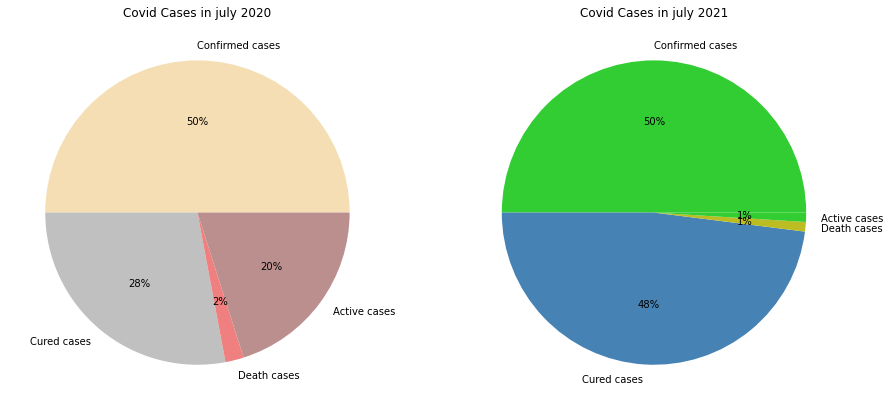

In [350]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
data = [8774499,4906066,342978,3525455]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['wheat','silver','lightcoral','rosybrown'])
ax1.set_title('Covid Cases in july 2020')

data = [42616625,40913352,858916,844357]
labels = ['Confirmed cases','Cured cases','Death cases','Active cases']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=[ 'limegreen','steelblue','#bcbd22'])
ax2.set_title('Covid Cases in july 2021')

### From above report we know the difference between cases of covid 19 of year  july 2020 and july 2021(mah) i.e 
###   --------July 2021 year                -----------------------------------------     July 2021 year 
### confirmed cases -      50%     --------------   confirmed cases - 50%  
### cured cases         - 28 %   --------------------  cured cases     - 48 %     
### active cases         - 20 %   ---------------------- active cases    - 1 %
### death cases          - 2 %    ----------------------- death cases     - 1%

In [351]:
totaljuly_2020=july_2020['Confirmed'].sum()
totaljuly_2020
totaljuly_2021=july_2021['Confirmed'].sum()
totaljuly_2021

42616625

In [352]:
totaljuly2020_recovery=july_2020['Cured'].sum()
recoveryjuly2020_rate=(totaljuly2020_recovery/totaljuly_2020)*100

totaljuly2021_recovery=july_2021['Cured'].sum()
recoveryjuly2021_rate=(totaljuly2021_recovery/totaljuly_2021)*100

In [353]:
totaljuly2020_death=july_2020['Deaths'].sum()
deathjuly2020_rate=(totaljuly2020_death/totaljuly_2020)*100

totaljuly2021_death=july_2021['Deaths'].sum()
deathjuly2021_rate=(totaljuly2021_death/totaljuly_2021)*100

In [354]:
 toatljuly2020_active=july_2020['active'].sum()
activejuly2020_rate=(toatljuly2020_active/totaljuly_2020)*100

toatljuly2021_active=july_2020['active'].sum()
activejuly2021_rate=(toatljuly2021_active/totaljuly_2021)*100

Text(0.5, 1.0, 'Covid cases rate in 2021')

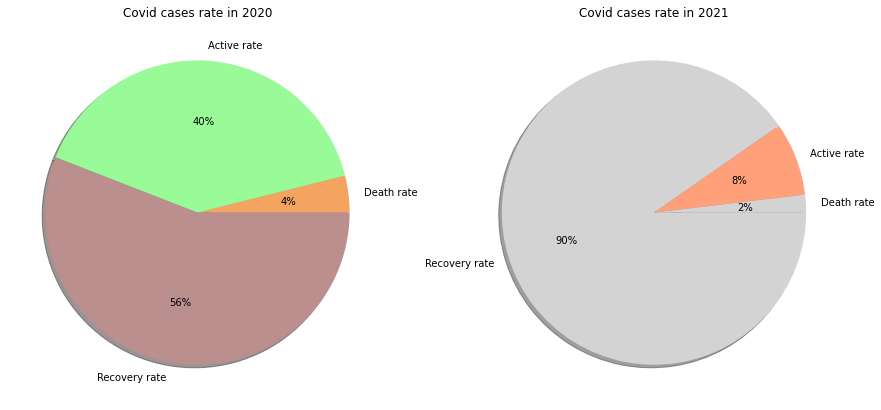

In [355]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
data = [deathjuly2020_rate,activejuly2020_rate,recoveryjuly2020_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax1.pie(data,labels=labels,autopct='%.0f%%',colors=['sandybrown','palegreen','rosybrown'],shadow=True)
ax1.set_title('Covid cases rate in 2020')
data = [deathjuly2021_rate,activejuly2021_rate,recoveryjuly2021_rate]
labels = ['Death rate','Active rate','Recovery rate']
ax2.pie(data,labels=labels,autopct='%.0f%%',colors=['lightgray', 'lightsalmon',],shadow=True)
ax2.set_title('Covid cases rate in 2021')


### From above report we know the difference between rates  of covid 19 cases of year 2020 and 2021 i.e 
###   --------july 2020 year                -------------------------july 2021 year 
### Recovery rate - 56%     --------------   Recovery rate - 90%  
### Active rate         - 40 %   --------------------  Active rate     -  8%     
### Death rate        - 4 %   ---------------------- Death rate   - 2 %


In [356]:
px.bar(x='weekday',y='Confirmed',data_frame=july_2020,color='Confirmed')

In [357]:
px.bar(x='weekday',y='Confirmed',data_frame=july_2021,color='Confirmed')

In [358]:
six_months=covid_mah.groupby('Date')[['Confirmed','Cured','Deaths','active']].sum()
six_months

,Confirmed,Cured,Deaths,active
Date,,,,
2020-03-09,2,0,0,2
2020-03-10,5,0,0,5
2020-03-11,2,0,0,2
2020-03-12,11,0,0,11
2020-03-13,14,0,0,14
...,...,...,...,...
2021-07-03,6079352,5836920,122353,120079
2021-07-04,6088841,5845315,122724,120802
2021-07-05,6098177,5848693,123030,126454


In [359]:
mah_sixmonths=six_months.resample('6M').sum().reset_index()
mah_sixmonths

,Date,Confirmed,Cured,Deaths,active
0,2020-03-31,1747,131,49,1567
1,2020-09-30,64040560,43371766,2043813,18624981
2,2021-03-31,352157710,324333590,8788098,19036022
3,2021-09-30,492692453,446083420,8482572,38126461


### Above six month wise total of covid 19 cases